### Sunaina 05301032017
### Kiran 05401032017
### Shivika 07301032017

## Problem

Predicting whether a person will get infected or not by Covid-19, utilizing the information about the symptoms like fever, cough, sore throat etc. recorded/reported  over number of days. The dataset used is Covid19-symptoms dataset on kaggle, prepared by making observations from various data sources published by the Government of India.

### Importing Libraries

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import feature_extraction, preprocessing
import plotly.graph_objs as go
import plotly.offline as py
import plotly.express as px

### Dataset Preprocessing

In [2]:
df= pd.read_excel('covid19-symptoms-dataset.xlsx')
df.head()

,Dry Cough,High Fever,Sore Throat,Difficulty in breathing,Infected with Covid19
0,0,2,3,0,No
1,15,15,20,16,Yes
2,4,5,0,0,No
3,4,7,9,10,No
4,0,0,1,0,No


In [3]:
df = df.rename(columns={'Difficulty in breathing':'Breathing','High Fever': 'fever','Infected with Covid19':'Infected', 'Dry Cough': 'Cough'})

In [4]:
X=df.iloc[:,:-1]
y=df.iloc[:,-1]
y = y.map({'Yes':1,'No':0}) #One Hot Encoding

### Naive Bayes 

In [5]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3, random_state=1)
# print(X_train,y_train)

In [23]:
from sklearn.naive_bayes import GaussianNB 
gnb = GaussianNB() 
gnb.fit(X_train, y_train) 
 
y_pred = gnb.predict(X_test) 

from sklearn import metrics 
print("Gaussian Naive Bayes model accuracy(in %):", metrics.accuracy_score(y_test, y_pred)*100)

from sklearn.metrics import precision_score
precision = precision_score(y_test, y_pred,average='macro')
print('Precision: %f' % precision)

from sklearn.metrics import recall_score
recall = recall_score(y_test, y_pred,average='macro')
print('Recall: %f' % recall)


Gaussian Naive Bayes model accuracy(in %): 86.66666666666667
Precision: 0.888889
Recall: 0.875000


### Confusion Matrix

In [19]:
cf=metrics.confusion_matrix(y_test, y_pred)
print(cf)

[[6 2]
 [0 7]]


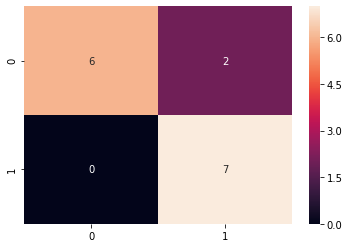

In [21]:
import seaborn as sns
sns.heatmap(cf, annot=True)

## Problem

Analysing degree of Covid-19 spread in different states and Union Territories of India on the basis of total number of confirmed cases, total number of casualties, cumulative cases and deaths etc recorded for respective states per day ranging from January 30, 2020 to September 17,2020. Classifying the states into Most Affected and Less Affected by applying Naive Bayes Classification technique for the same.

### Importing the libraries

In [7]:
import numpy as np
import pandas as pd
from urllib.request import urlretrieve
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import timedelta
import datetime
from itertools import cycle
import matplotlib.dates as mdates

### Data PreProcessing 

In [8]:
df = pd.read_csv('covid_19_india.csv')
df.head()

,Sno,Date,Time,StateAndUnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,30-01-2020,6:00 PM,Kerala,1,0,0,0,1
1,2,31-01-2020,6:00 PM,Kerala,1,0,0,0,1
2,3,01-02-2020,6:00 PM,Kerala,2,0,0,0,2
3,4,02-02-2020,6:00 PM,Kerala,3,0,0,0,3
4,5,03-02-2020,6:00 PM,Kerala,3,0,0,0,3


In [9]:
df=df.sort_values(by=['StateAndUnionTerritory', 'Date']) #sorting on the basis of Date
df['cum_cases'] = df.groupby(['StateAndUnionTerritory'])['Confirmed'].apply(lambda x: x.cumsum()) #grouping the confirmed cases
df['cum_deaths'] = df.groupby(['StateAndUnionTerritory'])['Deaths'].apply(lambda x: x.cumsum()) #grouping the deaths
df.head()  #cumulative deaths and cases

,Sno,Date,Time,StateAndUnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed,cum_cases,cum_deaths
530,531,01-04-2020,7:30 PM,Andaman and Nicobar Islands,-,-,0,0,10,10,0
1478,1479,01-05-2020,5:00 PM,Andaman and Nicobar Islands,-,-,16,0,33,43,0
2522,2523,01-06-2020,8:00 AM,Andaman and Nicobar Islands,-,-,33,0,33,76,0
3603,3604,01-07-2020,8:00 AM,Andaman and Nicobar Islands,-,-,50,0,97,173,0
4706,4707,01-08-2020,8:00 AM,Andaman and Nicobar Islands,-,-,214,5,548,721,5


In [25]:
lista = df[df.cum_cases>df['cum_cases'].max()/20]['StateAndUnionTerritory'].unique() #considering the maximum number of cases from cumulative cases statewise 
df[df.StateAndUnionTerritory.isin(lista)].groupby(['StateAndUnionTerritory'])[['Confirmed','Deaths']].describe(percentiles=[0.1,0.5,0.6,0.75,0.9])

Confirmed                                            \
                           count           mean            std  min    10%   
StateAndUnionTerritory                                                       
Andhra Pradesh             190.0  101598.478947  168715.496926  1.0   38.3   
Assam                      170.0   30978.200000   43789.444433  1.0   35.0   
Bihar                      180.0   36285.483333   51982.280784  2.0   38.9   
Delhi                      200.0   67070.555000   70973.700389  1.0   28.7   
Gujarat                    182.0   36855.802198   35271.688359  5.0  165.0   
Haryana                    198.0   19501.338384   25998.887348  2.0   27.4   
Karnataka                  193.0   82441.098446  133398.086272  1.0   59.2   
Kerala                     232.0   14901.129310   27708.353896  1.0    3.0   
Madhya Pradesh             181.0   21465.392265   24426.169539  4.0  229.0   
Maharashtra                193.0  246839.145078  305637.839977  2.0  181.2   
Odisha                     186.0   25704.279570   41424.210444  1.0    5.0   
Punjab                     193.0   13553.818653   21145.831093  1.0   38.0   
Rajasthan                  199.0   24643.703518   30093.166292  1.0   27.2   
Tamil Nadu                 195.0  128419.353846  161251.283707  1.0   27.2   
Telengana                  153.0   36862.575163   54199.770731  1.0    5.2   
Uttar Pradesh              198.0   57725.949495   87978.910754  6.0   32.4   
West Bengal                184.0   45256.858696   62097.036054  1.0   80.0   

                                                                            \
                             50%       60%        75%       90%        max   
StateAndUnionTerritory                                                       
Andhra Pradesh            6064.0   16431.8  138339.00  404670.8   592760.0   
Assam                     6014.5   14974.4   49874.00  106100.6   148969.0   
Bihar                     7103.0   12303.0   57600.00  133206.2   162463.0   
Delhi                    30626.0   83910.6  132533.75  167784.8   230269.0   
Gujarat                  25347.0   36478.0   63287.25   93605.8   117547.0   
Haryana                   5394.0   14277.6   33442.25   59687.4   101316.0   
Karnataka                 6516.0   16814.4  118632.00  316960.0   484990.0   
Kerala                     821.0    2590.4   13454.00   59379.8   117863.0   
Madhya Pradesh           11426.0   15284.0   33535.00   60875.0    95515.0   
Maharashtra             101141.0  181563.6  411798.00  745109.6  1121221.0   
Odisha                    4109.0    8601.0   33078.50   96294.0   162920.0   
Punjab                    2986.0    5691.2   15456.00   49069.6    87184.0   
Rajasthan                11245.0   17582.2   38739.00   76286.0   107680.0   
Tamil Nadu               38716.0   91719.8  237046.00  406839.6   519860.0   
Telengana                 1509.0    2716.8   80751.00  130010.6   165003.0   
Uttar Pradesh            11472.5   22960.8   76488.25  210040.5   330265.0   
West Bengal              12104.5   21947.0   73461.75  155862.4   212383.0   

                       Deaths                                               \
                        count         mean          std  min   10%     50%   
StateAndUnionTerritory                                                       
Andhra Pradesh          190.0   944.621053  1495.984577  0.0   0.0    83.0   
Assam                   170.0    84.070588   129.649394  0.0   1.0     9.0   
Bihar                   180.0   184.872222   246.087622  1.0   1.0    47.0   
Delhi                   200.0  1834.015000  1867.726249  0.0   1.0   889.5   
Gujarat                 182.0  1477.148352  1112.246095  0.0  13.0  1575.5   
Haryana                 198.0   226.994949   281.089803  0.0   0.0    48.5   
Karnataka               193.0  1401.829016  2193.615109  0.0   2.2    79.0   
Kerala                  232.0    57.991379   108.616446  0.0   0.0     4.0   
Madhya Pradesh          181.0   585.784530 

### Visualisation

In [26]:
from matplotlib.colors import ListedColormap
def visual(X,y, title, step=1000):
    plt.figure(figsize=(15,7))
    markers = ('o', 'x')
    X1, X2 = np.meshgrid(np.arange(start = X[:, 0].min() - 1, stop = X[:, 0].max() + 1, step = 1000), np.arange(start = X[:, 1].min() - 1, stop = X[:, 1].max() + 1, step = step))
    plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape), alpha = 0.4, cmap = ListedColormap(('yellow', 'cyan')))
    plt.xlim(X1.min(), np.percentile(X1, 60))
    plt.ylim(X2.min(), np.percentile(X2, 60))
    for i, j in enumerate(np.unique(y)):
        plt.scatter(X[y == j, 0], X[y == j, 1],alpha= 0.5, c = np.array([ListedColormap(('darkred', 'blue'))(i)]), marker=markers[i], label = j)
    plt.title(title, fontsize=18)
    plt.xlabel('Maximum Daily Cases', fontsize=12)
    plt.ylabel('Cumulated Deaths', fontsize=12)
    for cntr in ['Andhra Pradesh', 'Assam', 'Bihar', 'Delhi', 'Gujarat','Haryana', 'Karnataka', 'Kerala', 'Madhya Pradesh','Maharashtra', 'Odisha', 'Punjab', 'Rajasthan','Tamil Nadu', 'Telengana','Uttar Pradesh','West Bengal']:
        if grouped.loc[cntr,'cum_deaths']<np.percentile(X2, 60):
            plt.text(grouped.loc[cntr, 'Confirmed'], grouped.loc[cntr,'cum_deaths'], cntr, size=8, color='black', alpha=0.9)
    plt.legend()
    plt.show()

In [27]:
df=df.dropna()  #remove NA values
grouped = df.groupby('StateAndUnionTerritory')[['Confirmed','Deaths','cum_cases','cum_deaths']].max() #taking maximum of each state 
X=grouped.loc[:, ['Confirmed', 'cum_deaths']].values #taking 2 columns: Confirmed, cumulative deaths
y=[]

for i in grouped.Confirmed:
    if i> grouped.cum_cases.max()/300:    #if value of i greater than max of cumulative cases then classify as most affected
        y.append(1)
    else:
        y.append(0)  #else classify as less affected

In [28]:
from sklearn.naive_bayes import GaussianNB
classifier=GaussianNB()
classifier.fit(X, y)   #fitting in naive bayes

GaussianNB(priors=None, var_smoothing=1e-09)

[[      1    1001    2001 ... 1119001 1120001 1121001]]


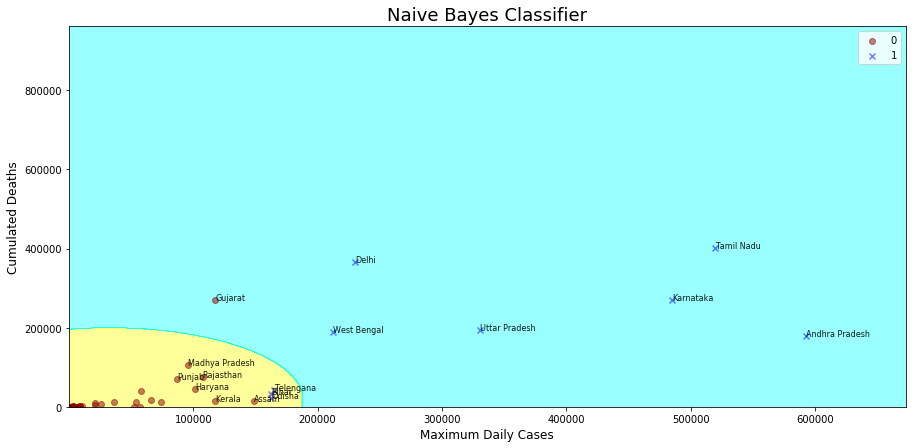

In [29]:
visual(X,y, 'Naive Bayes Classifier')